<a href="https://colab.research.google.com/github/cppel/data/blob/main/3_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Matplotlib_Seaborn_Pandas)_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика. Визуальный анализ данных (Matplotlib/Seaborn/Pandas). Часть 1

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/3.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Matplotlib_Seaborn_Plotly.ipynb)
- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# В последней версии matplotlib неправильно работает heatmap
# https://github.com/mwaskom/seaborn/issues/3478
# Необходим даунргейд

%pip install matplotlib==3.7.1 seaborn==0.12.2 -U

import matplotlib
import seaborn
print(matplotlib.__version__)
print(seaborn.__version__)

3.7.1
0.12.2


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

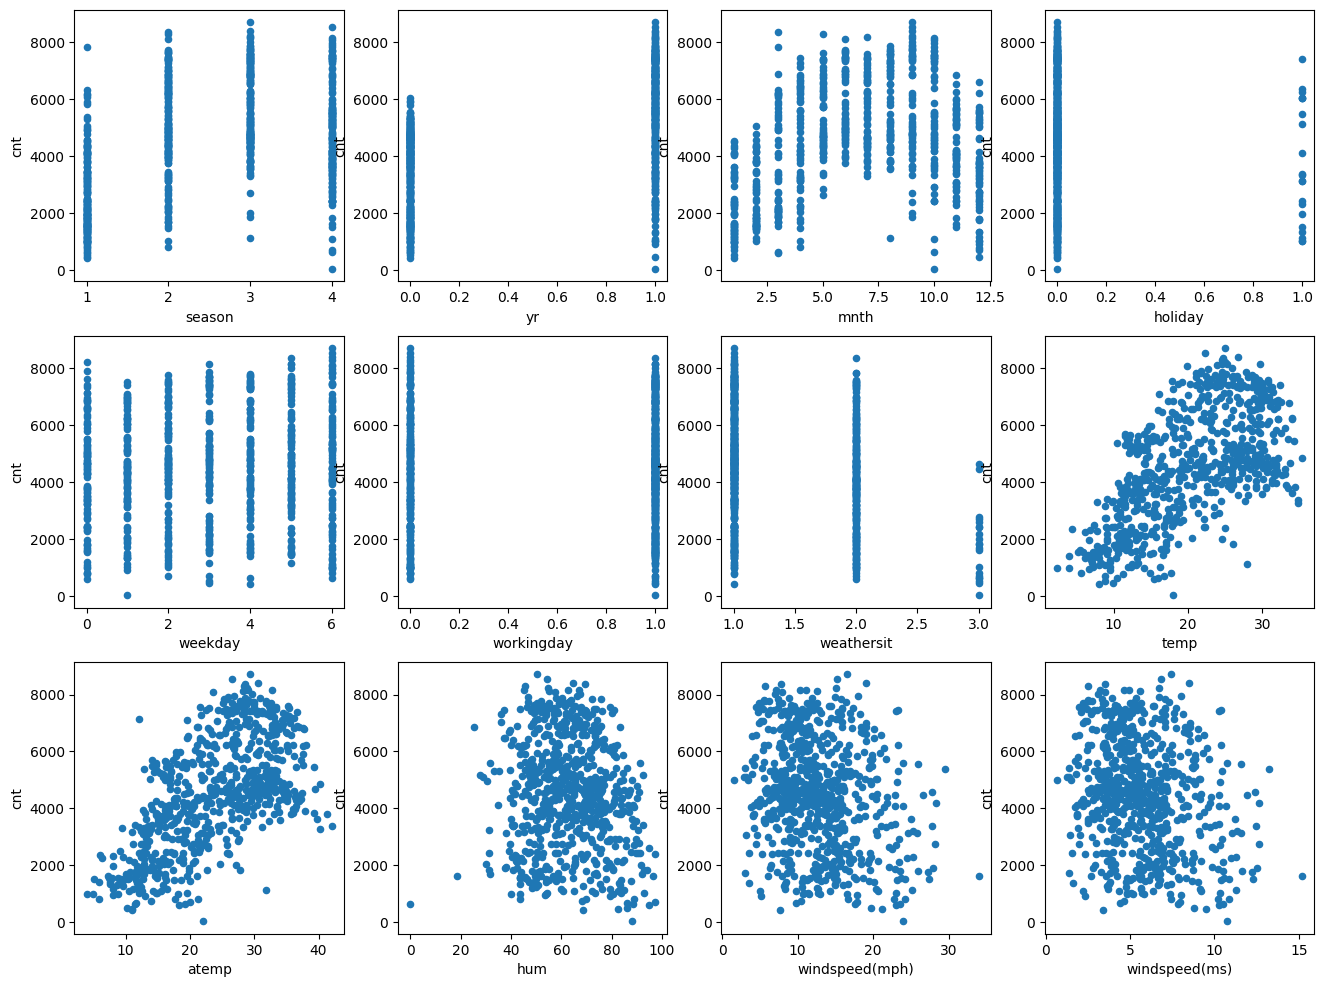

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: ярко выраженная зависимость в зависимости от месяца. Мы видим, что зимой количество поездок минимально, а в марте, начале весны, происходит резкий всплеск. Затем число поездок постепенно увеличивается вплоть до сентября, где достигает своего пика. После сентября начинается снижение, которое продолжается вплоть до января.

Это интересная зависимость и может быть связана с различными факторами. Например, зимой люди могут быть менее склонны к путешествиям из-за холодной погоды и возможных праздников, когда они проводят время дома с семьей и друзьями. В то же время, весной и летом люди могут чаще планировать отпуска и поездки, что ведет к увеличению числа поездок.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: линейная зависимость присутствует в `temp` и `atemp`.

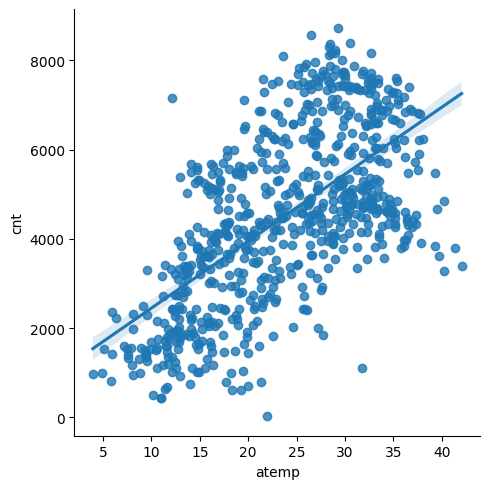

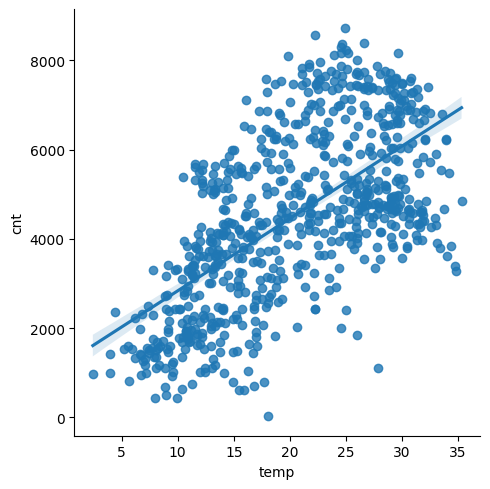

In [ ]:
sns.lmplot(df[['atemp', 'cnt']], x='atemp', y='cnt')
sns.lmplot(df[['temp', 'cnt']], x='temp', y='cnt')

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: меньше всего коррелирует с праздниками, влажностью, рабочими днями и днями недели

Больше всего же коррелирует с температурой, сезоном и годом

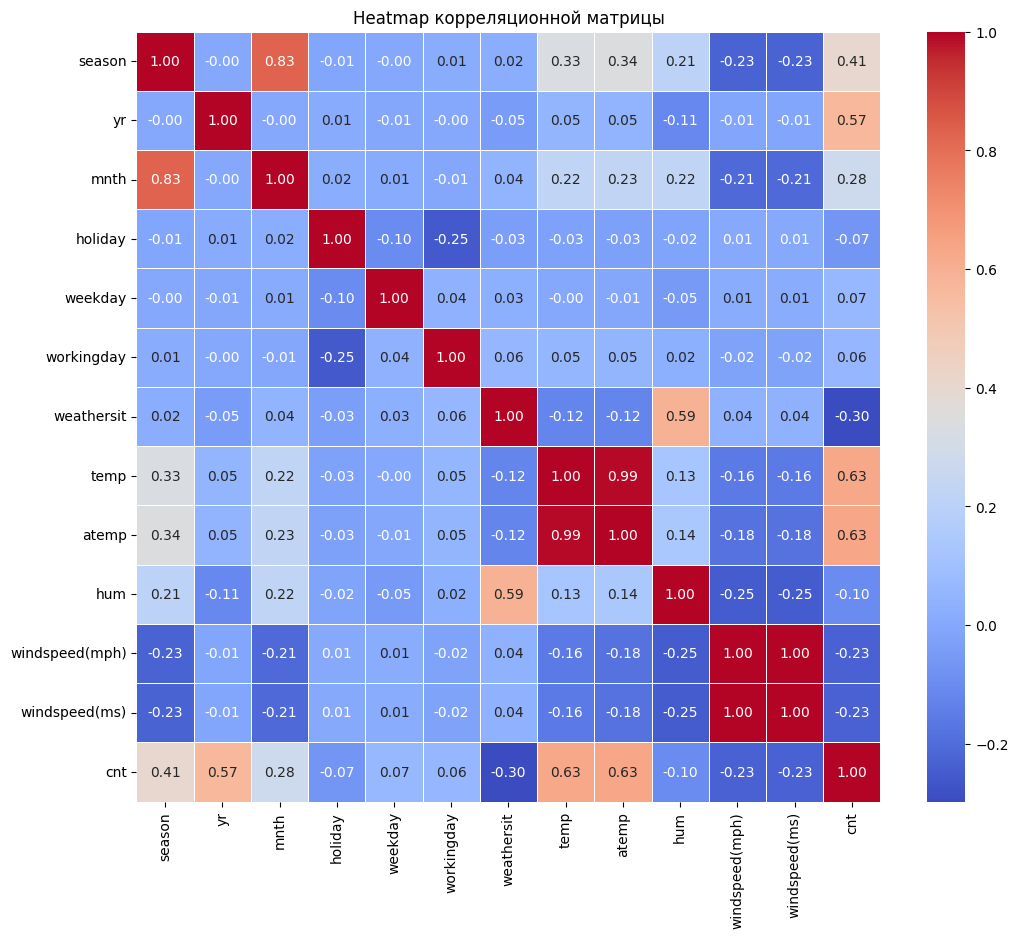

In [ ]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

plt.figure(figsize=(12, 10))

heatmap = df.select_dtypes('number').corr()
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap корреляционной матрицы')
plt.show()

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: из-за в целом возрастающей со временем популярности проката

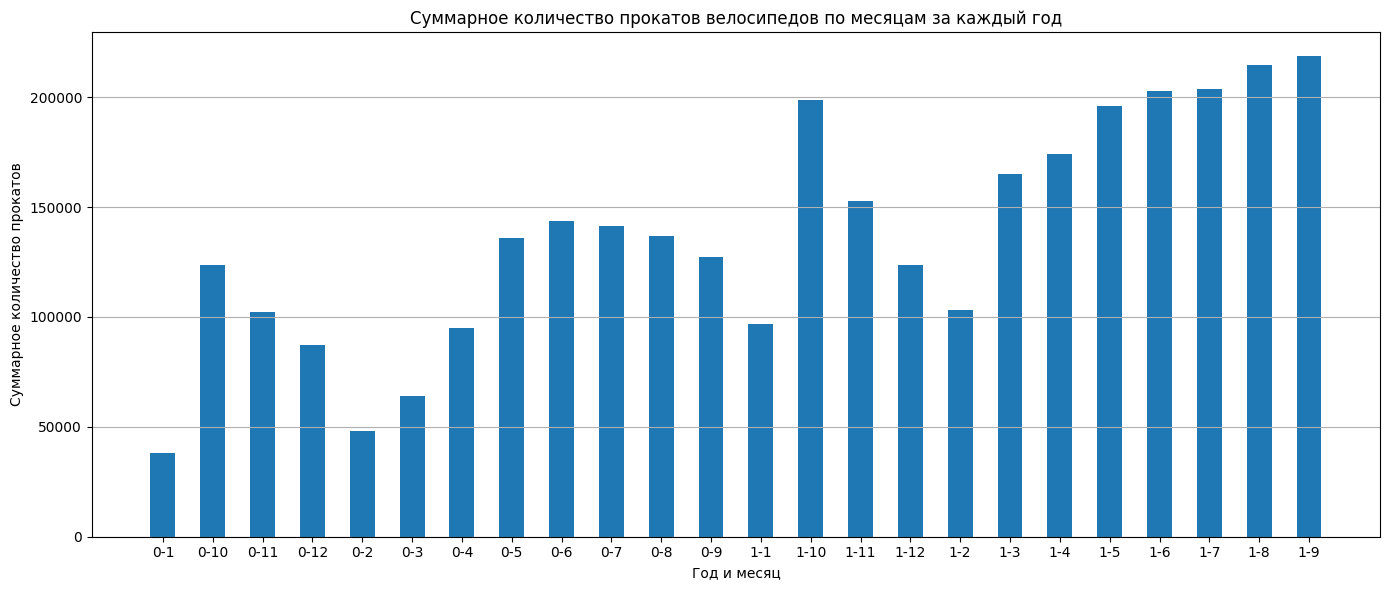

In [ ]:
st = df.copy()
st['year_month'] = st['yr'].astype(str) + '-' + st['mnth'].astype(str)

monthly_counts = st.groupby('year_month')['cnt'].sum()
years, months = zip(*[x.split('-') for x in monthly_counts.index])

plt.figure(figsize=(14, 6))
plt.bar(monthly_counts.index, monthly_counts.values, width=0.5)
plt.title('Суммарное количество прокатов велосипедов по месяцам за каждый год')
plt.xlabel('Год и месяц')
plt.ylabel('Суммарное количество прокатов')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

*Ответ*: данные поступали ежедневно. Из-за этого, скорее всего, снимались средние показания за весь день (в т.ч. и погода)
    
Ответ: равномерное распределение

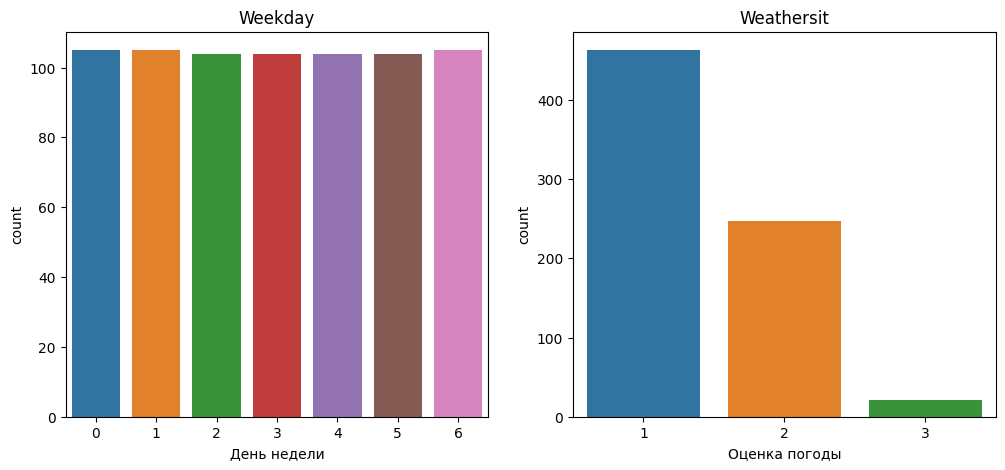

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=st, x='weekday')
plt.title('Weekday')
plt.xlabel('День недели')


plt.subplot(1, 2, 2)
sns.countplot(data=st, x='weathersit')
plt.title('Weathersit')
plt.xlabel('Оценка погоды')

plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: 4000 - 5000

Ответ: нормальное распределение

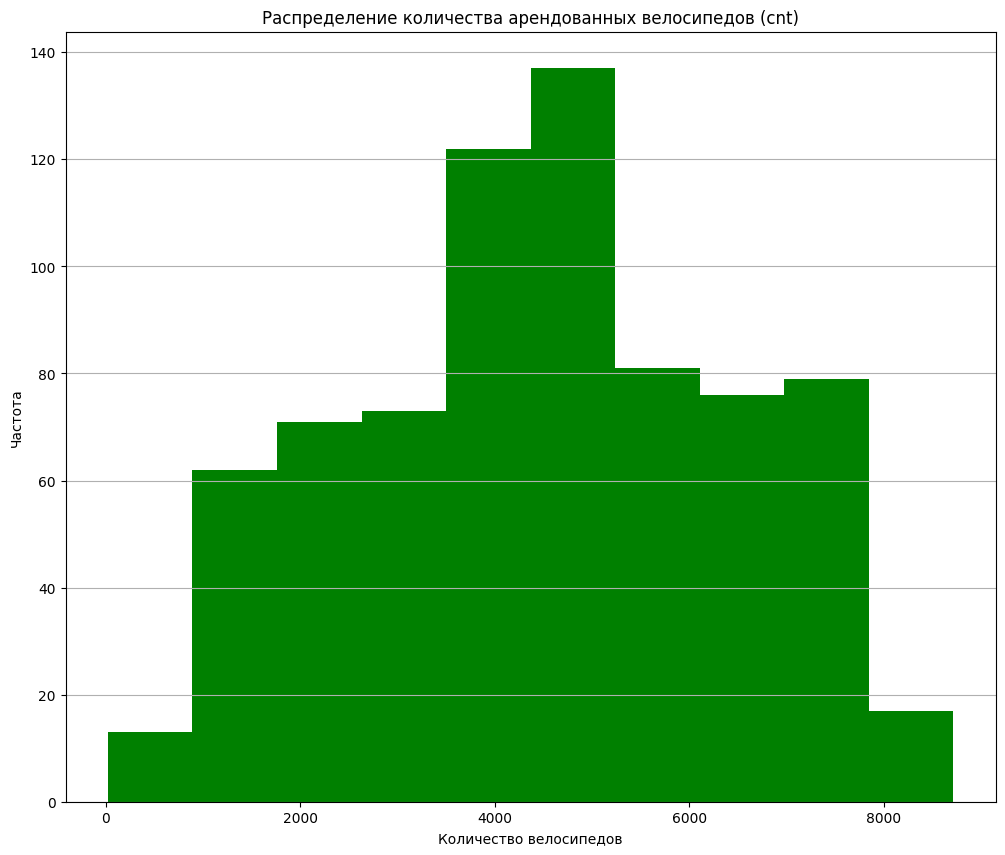

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(st['cnt'], color='g')
plt.title('Распределение количества арендованных велосипедов (cnt)')
plt.xlabel('Количество велосипедов')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: данные имеют высокую корреляцию. Возможно, показания `atemp` в данном случае излшни

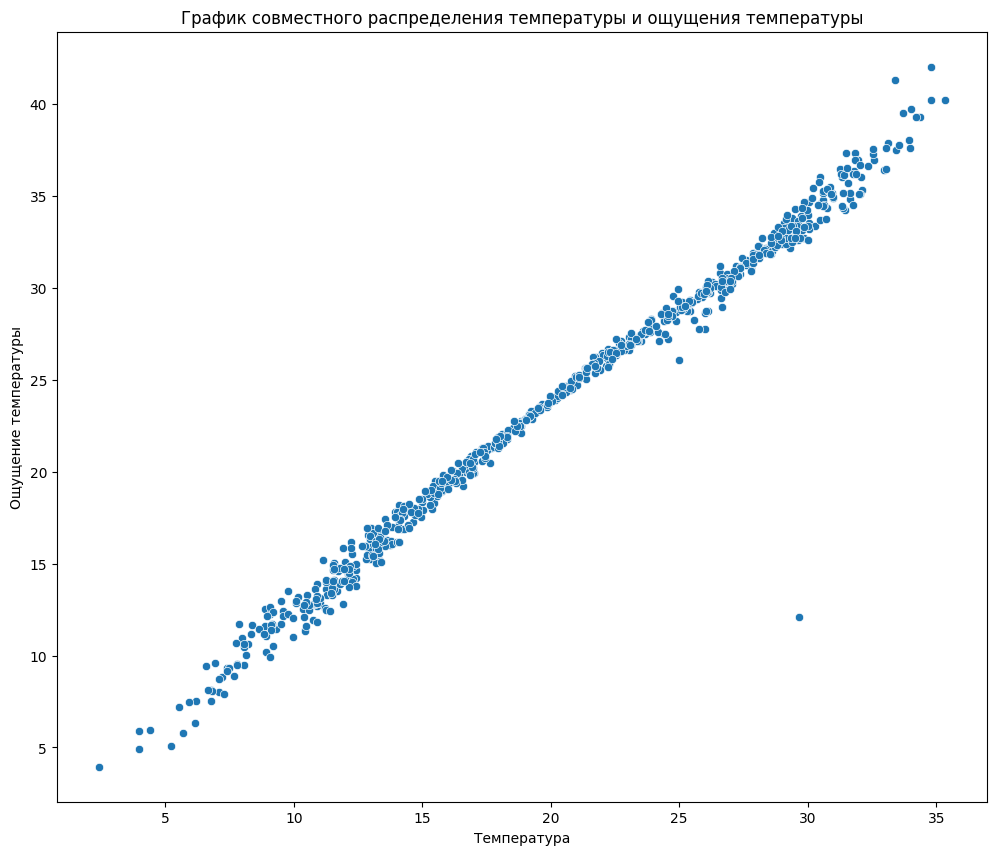

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=st, x='temp', y='atemp')
plt.title('График совместного распределения температуры и ощущения температуры')
plt.xlabel('Температура')
plt.ylabel('Ощущение температуры')
plt.show()

## 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: потому что вне сезона (особенно зима) меньше спрос на прокат, однако остаётся достаточно народу, которые используют прокатный транспорт как средство передвижения до рабочего места. В сезонное время спрос на прокатный транспорт сильно возрастает и его чаще используют как средство для проведения досуга

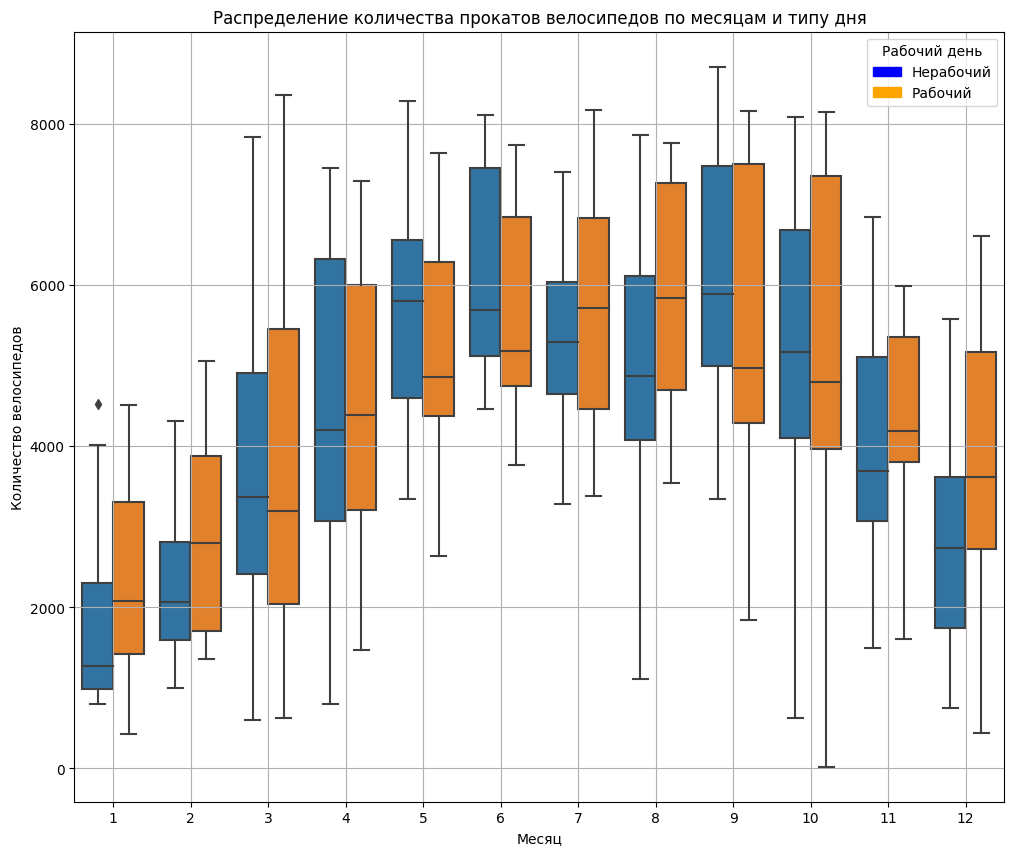

In [ ]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='blue', label='Нерабочий')
blue_patch = mpatches.Patch(color='orange', label='Рабочий')

plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x='mnth', y='cnt', hue='workingday')
plt.title('Распределение количества прокатов велосипедов по месяцам и типу дня')
plt.xlabel('Месяц')
plt.ylabel('Количество велосипедов')
plt.legend(title='Рабочий день', handles=[red_patch, blue_patch])
plt.grid(True)
plt.show()